## Описание проекта

Для экономически целесообразной закупки продуктов в интернет-магазин в 2017-м году требуется выявление потенциально популярного продукта среди игр. 

Соответственно, цель исследования — выявить определяющие успешность игры закономерности:
- Влияние жанра игры, платформы, региона, оценок, рейтинга на популярность игр
- Тенденции в спросе на жанры и платформы в зависимости от регионов и в целом

Данные об играх до 2016 года включительно взяты из файла https://code.s3.yandex.net/datasets/games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор и предобработка данных.

Таким образом, исследование пройдёт в три этапа:

- Обзор данных
- Предобработка данных
- Выявление общих закономерностей 
- Выявление закономерностей по регионам
- Проверка гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## 1 Первичный анализ данных

Загрузим данные

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Таблица состоит из игр, их описания, продаж и оценки пользователей.

In [4]:
data.shape

(16715, 11)

Рассмотрим информацию о датасете. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что есть пропуски, некоторые типы данных изменены.

Проверим датасет на наличие очевидных дубликатов

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет

Оценочно смотрим на распределения

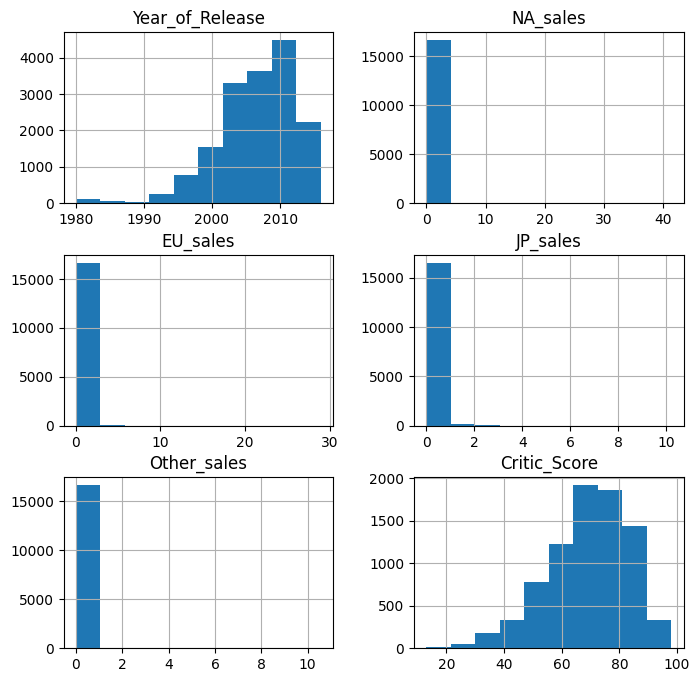

In [7]:
data.hist(figsize=(8, 8));

## 2 Подготовка данных

Исправим названия для удобства: переведем в строчный тип написания, дадим развернутые названия

In [8]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
data = data.rename(columns={'NA_sales' : 'north_america_sales', 'EU_sales' : 'europe_sales', 'JP_sales' : 'japan_sales',
                           'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release',
                           'Genre' : 'genre', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score',
                           'User_Score' : 'user_score', 'Rating' : 'rating'})

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'north_america_sales',
       'europe_sales', 'japan_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

Оценим количество пропусков.

In [11]:
data.isna().sum().sort_values(ascending=False)

critic_score           8578
rating                 6766
user_score             6701
year_of_release         269
name                      2
genre                     2
platform                  0
north_america_sales       0
europe_sales              0
japan_sales               0
other_sales               0
dtype: int64

In [12]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
north_america_sales,0.000000
europe_sales,0.000000
japan_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Пропущена половина оценок от критиков, треть от пользователей и треть рейтинговых оценок. Скорее всего это связано с тем, что сайты не использовали систему оценивания в описании, и эти данные, соответственно, отсутствуют. Лучше их не заполнять, потому что среднее или медиана могут сильно исказить данные, нули тем более. Год релиза заполнить можно, нужно найти повторы данных об играх и заполнить пропуск значением оттуда. Пропуски в названии и жанре рассмотрю далее.

Строки с пропусками названия и жанра неинформативны, стоит их удалить, это не повлияет на общий результат оценки

In [13]:
data.query('name.isna()')

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
data = data.query('~name.isna()')

Удалим также строки с пропущенными данными о дате релиза

In [15]:
data = data.query('~year_of_release.isna()')

Довольно часто отсутсвие оценок от критика и пользователя сопутствует отсутсвию рейтинга, как и было выдвинуто ранее, эти данные просто отсутсвовали на сайте

In [16]:
data.query('user_score.isna()')

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполним пропуски в рейтинге заглушкой 

In [17]:
data.loc[data['rating'].isna(), 'rating'] = 'Unknown'

Приведем год релиза к типу int

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)

tbd в столбце user_score значит "требует уточнения", что соответсвует значению NaN, поэтому заполним все tbd значениями nan

In [19]:
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan

Переведем рейтинг пользвателей в числовое значение

In [20]:
data['user_score'] = data['user_score'].astype(float)

Добавим колонку с общими продажами

In [21]:
data['total_sales'] = data['north_america_sales'] + data['europe_sales'] + data['japan_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


Проверим данные на наличие неявных дубликатов

In [22]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Есть одна дублирующаяся строка, второй ее вариант неинформативен, можно удалить

In [23]:
data = data.drop_duplicates(subset=['name', 'platform','year_of_release'], keep='first')

<b>Итог:<b/> 
- Изначально пропущена половина оценок от критиков, треть от пользователей и треть рейтинговых оценок, также в двух строках - название и жанр. Отсутсвие оценок от критика и пользователя сопутствует отсутсвию рейтинга, эти данные отсутсвовали на сайте
- Строки с пропусками названия и жанра удалены из-за отсутсвия информативности
- Стро с пропусками дате релиза удалены, так как это не исказит информацию, дата перевена в целочисленный формат
- Пропуски в рейтинге изменены на заглушки
- tbd значит "требует уточнения", что соответсвует значению NaN, все tbd заменены на nan
- Удалена одна неявно дублирующуюся строка

## 3 Исследовательский анализ данных

Посмотрим появление игр по годам

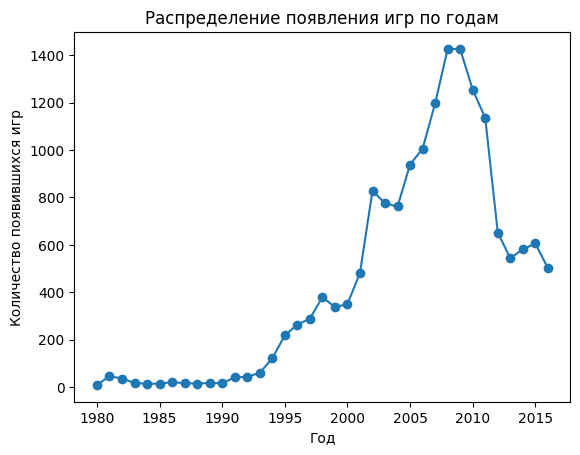

In [24]:
ax = (data
 .pivot_table(index='year_of_release',
              values='name',
             aggfunc='count')
 .plot(style='-o')
)
ax.get_legend().remove()
ax.set_title('Распределение появления игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество появившихся игр');

Несмотря на то, что известные в мире игры появились в 1980-м году, активное их распространение началось примерно с 90-95-х годов

Наибольшее количество игр активно выпускалось с 2008 по 2011-12 года, посмотрим точные числа

In [25]:
data.groupby(by='year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

И вправду, максимальное количество игр выпускалось в 2008-2009 годах. Теперь рассмотрим распределение продаж по типам платформы

In [26]:
platform_sales = (data
                  .groupby(by='platform')
                  .agg({'north_america_sales' : 'sum', 'europe_sales' : 'sum', 'japan_sales' : 'sum', 'other_sales' : 'sum', 'total_sales' : 'sum'})
                 )

In [27]:
platform_sales

,north_america_sales,europe_sales,japan_sales,other_sales,total_sales
platform,,,,,
2600,80.78,4.86,0.00,0.84,86.48
3DO,0.00,0.00,0.10,0.00,0.10
3DS,82.65,61.27,100.62,13.27,257.81
DC,5.43,1.69,8.56,0.27,15.95
DS,380.31,188.41,175.02,59.04,802.78
GB,113.64,47.51,85.12,8.16,254.43
GBA,184.12,74.59,46.56,7.61,312.88
GC,131.94,38.32,21.34,5.13,196.73
GEN,19.27,5.52,2.67,0.89,28.35


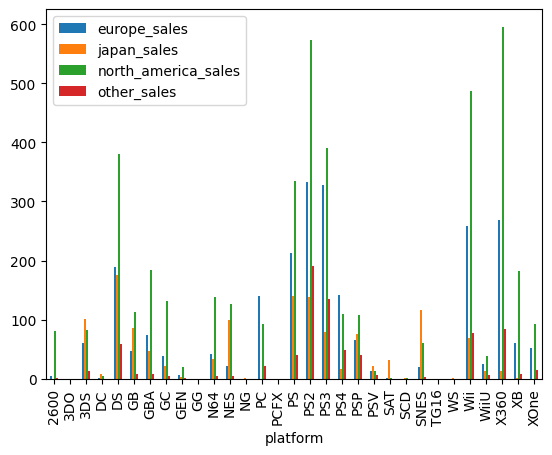

In [28]:
(platform_sales
 .pivot_table(index='platform', values=['north_america_sales','europe_sales','japan_sales', 'other_sales'])
 .plot(kind='bar')
);

Большинство платформ чаще всего продавалось в Северной Америке, что логично, потому что игры начали свое распространение с этого материка, плюс, количество людей в этой группе гораздо больше, чем в Европе или Японии. Тем-не-менее, некоторые платформы были популярны в других частях света. Так, ПК-игры и и игры на PS4 (PlayStation 4) чаще продавались в Европе, а игры на 3DS (Nintendo 3DS), SAT (Sega Saturn), PSV (PSVita) и SNES (Super Nintendo) в Японии, что логично, потому что они оттуда родом и, вероятно, не получили широкого распространения в других частях света.

Рассмотрим продажи по платформам

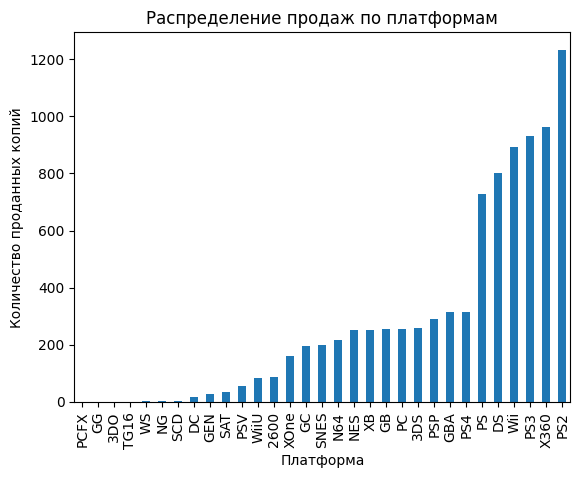

In [29]:
ax = (platform_sales
 .pivot_table(index='platform', values='total_sales')
 .sort_values(by='total_sales')
 .plot(kind='bar')
)
ax.set_title('Распределение продаж по платформам')
ax.set_xlabel('Платформа')
ax.get_legend().remove()
ax.set_ylabel('Количество проданных копий');

In [30]:
top_sales = platform_sales.query('total_sales > 600').index
top_sales

Index(['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'], dtype='object', name='platform')

Наибольшие суммарные продажи за все время с большим отрывом принесли платформы DS (Nintendo DS), PS (PlayStation), PS2 (PlayStation 2), PS3 (PlayStation 3), Wii (Nintendo Wii), X360 (Xbox 360)

In [31]:
total_sales_per_year = (data
                  .groupby(by=['platform', 'year_of_release'])
                  .agg({'total_sales' : 'sum'})
                    .query('platform in @top_sales')
                    .reset_index()
                 )

Посмотрим распределение продаж для каждой платформы по годам

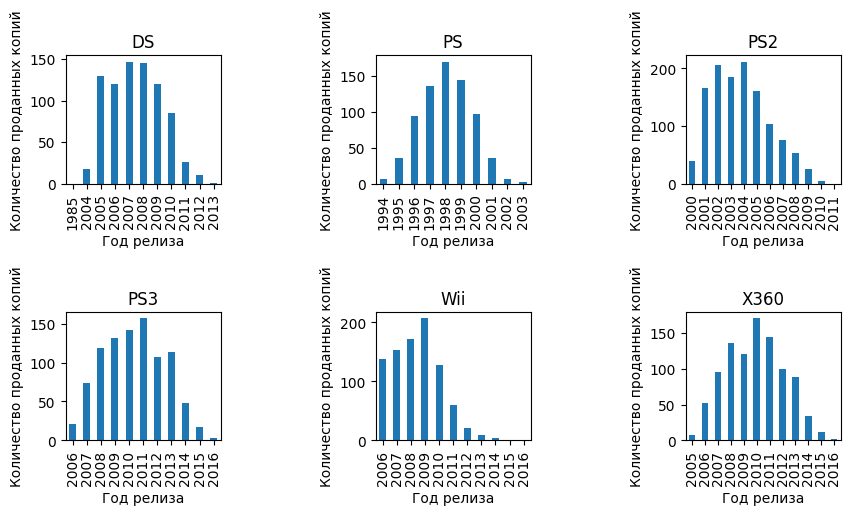

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
plt.subplots_adjust(hspace=1, wspace=1)

for name, ax in zip(top_sales, axs.ravel()):
    pl = total_sales_per_year[total_sales_per_year['platform'] == name].plot(kind='bar',
                                                                        x='year_of_release',
                                                                        y='total_sales',
                                                                        ax=ax)
    pl.set_title(name)
    pl.get_legend().remove()
    pl.set_xlabel('Год релиза')
    pl.set_ylabel('Количество проданных копий')

In [33]:
data.query('platform == "DS" and year_of_release == 1985')
data = data.drop(index=15957)

In [34]:
total_sales_per_year = (data
                  .groupby(by=['platform', 'year_of_release'])
                  .agg({'total_sales' : 'sum'})
                    .query('platform in @top_sales')
                    .reset_index()
                 )

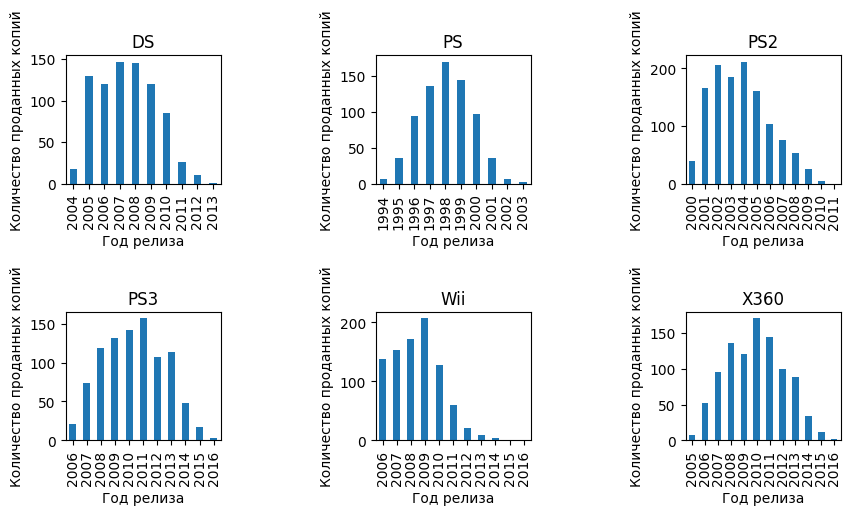

In [35]:
ig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
plt.subplots_adjust(hspace=1, wspace=1)

for name, ax in zip(top_sales, axs.ravel()):
    pl = total_sales_per_year[total_sales_per_year['platform'] == name].plot(kind='bar',
                                                                        x='year_of_release',
                                                                        y='total_sales',
                                                                        ax=ax)
    pl.set_title(name)
    pl.get_legend().remove()
    pl.set_xlabel('Год релиза')
    pl.set_ylabel('Количество проданных копий')

Видно, что средний срок, за который в продажах появляется, становится популярной и затем пропадает каждая из этих платформ, - это 8-10 лет, поэтому стоит взять последние (до 2016) 4 года как актуальный срок и рассматривать их

In [36]:
actual_data = data.query('year_of_release > 2012')

In [37]:
actual_platform_sales = (actual_data
                  .groupby(by='platform')
                  .agg({'north_america_sales' : 'sum', 'europe_sales' : 'sum', 'japan_sales' : 'sum', 'other_sales' : 'sum', 'total_sales' : 'sum'})
                 )

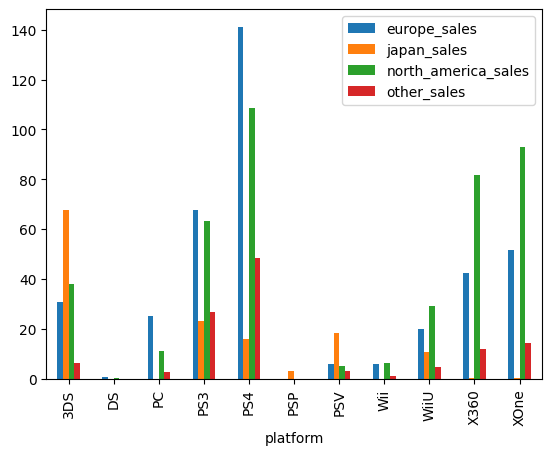

In [38]:
(actual_platform_sales
 .pivot_table(index='platform', values=['north_america_sales','europe_sales','japan_sales', 'other_sales'])
 .plot(kind='bar')
);

В последние 4 года максимальное количество продаж игр осуществлялось в Европе на платформе PS4. Она же и лидер по продажам в Северной Америке. А вот в Японии с гоаздо популярнее игры на 3DS.Следующие по популярности для Европы и Америки платформы - XOne, X360 и PS3. В Японии - PS3, PSV и PS4.

Рассмотрим общее распределение платформ по продажам за актуальный период

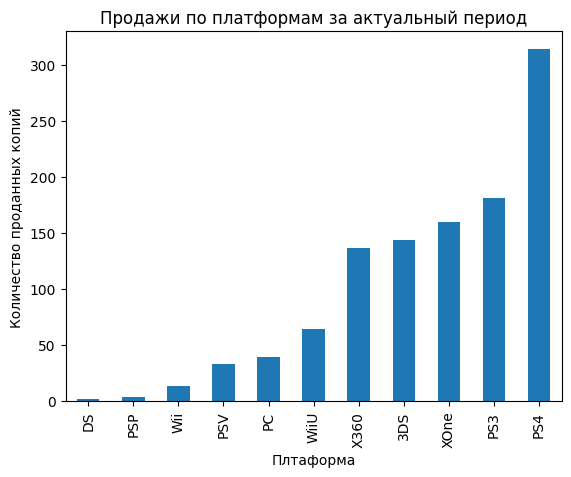

In [39]:
pl = (actual_platform_sales
 .pivot_table(index='platform', values='total_sales')
 .sort_values(by='total_sales')
 .plot(kind='bar')
)
pl.set_title('Продажи по платформам за актуальный период')
pl.get_legend().remove()
pl.set_xlabel('Плтаформа')
pl.set_ylabel('Количество проданных копий');

Наиболее часто продаваемые за актуальный период платформы - PS4, PS3, XOne, 3DS и X360.

In [40]:
actual_sales_per_year = (actual_data
                  .groupby(by=['platform', 'year_of_release'])
                  .agg({'total_sales' : 'sum'})
                    .reset_index()
                 )

Посмотрим, растут или падают продажи каждой из актуальных платформ

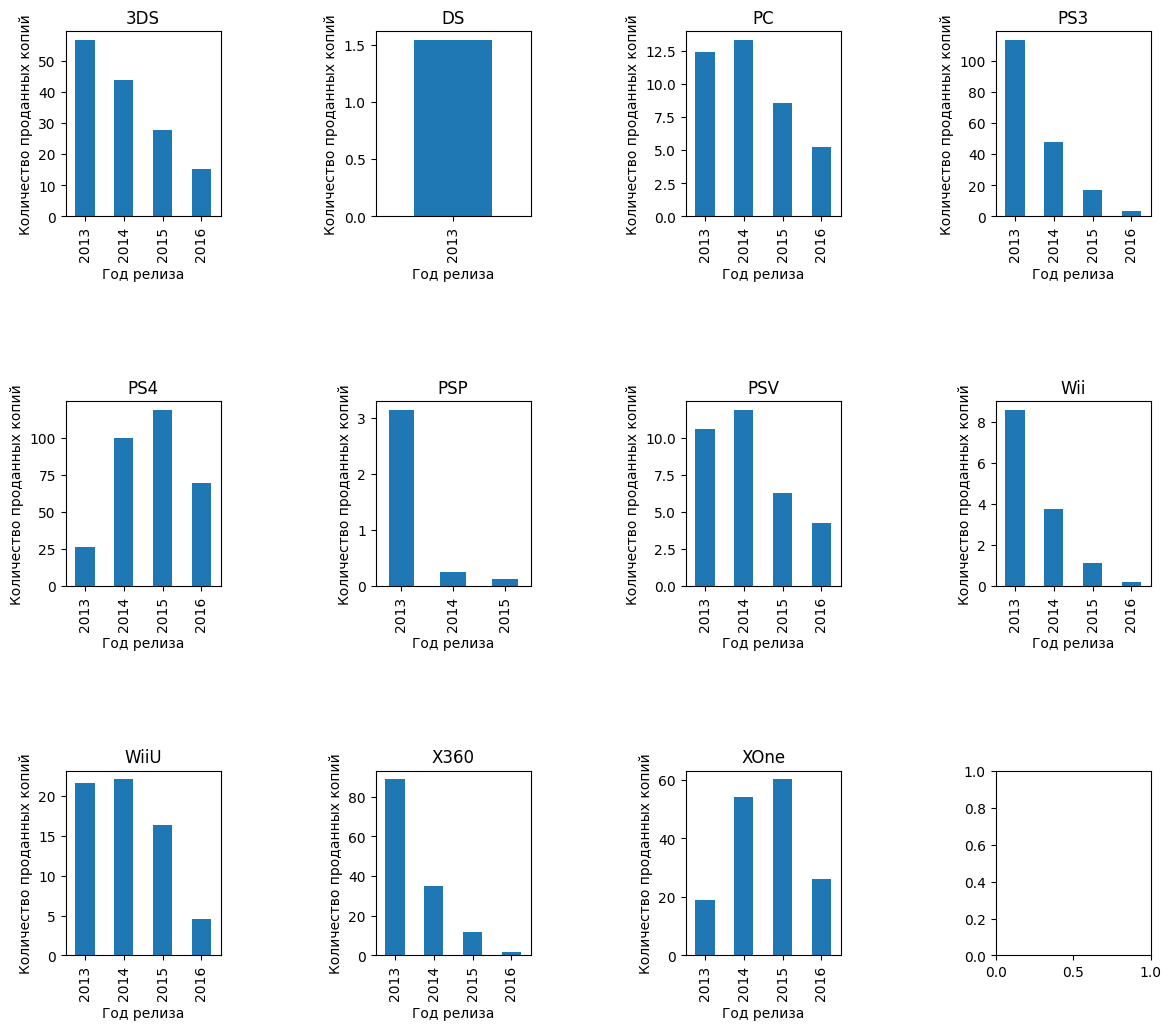

In [41]:
actual_platforms = actual_sales_per_year['platform'].unique()
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14,12))
plt.subplots_adjust(hspace=1, wspace=1)

for name, ax in zip(actual_platforms, axs.ravel()):
    pl = actual_sales_per_year[actual_sales_per_year['platform'] == name].plot(kind='bar',
                                                                        x='year_of_release',
                                                                        y='total_sales',
                                                                        ax=ax)
    pl.set_title(name)
    pl.get_legend().remove()
    pl.set_xlabel('Год релиза')
    pl.set_ylabel('Количество проданных копий')

Из распределений видно, что на этапе развития находятся платформы PS4, PSV, WiiU и PC, все остальные уже становятся малопопулярными к 2016-му году

Построим "ящик с усами" для продаж по каждой из патформ, несколько ограничим его для удобства восприятия

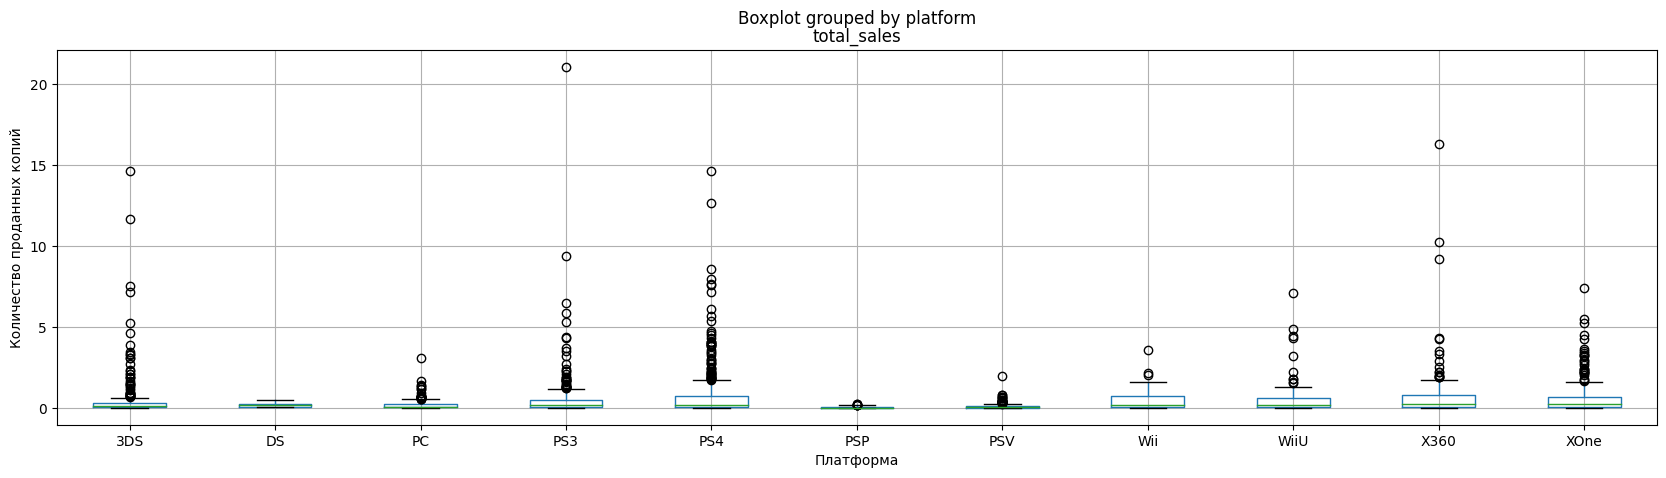

In [42]:
ax = actual_data.boxplot(column='total_sales', by='platform', figsize=(20, 5))
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий');

Уменьшим масштаб по оси y для лучшего восприятия

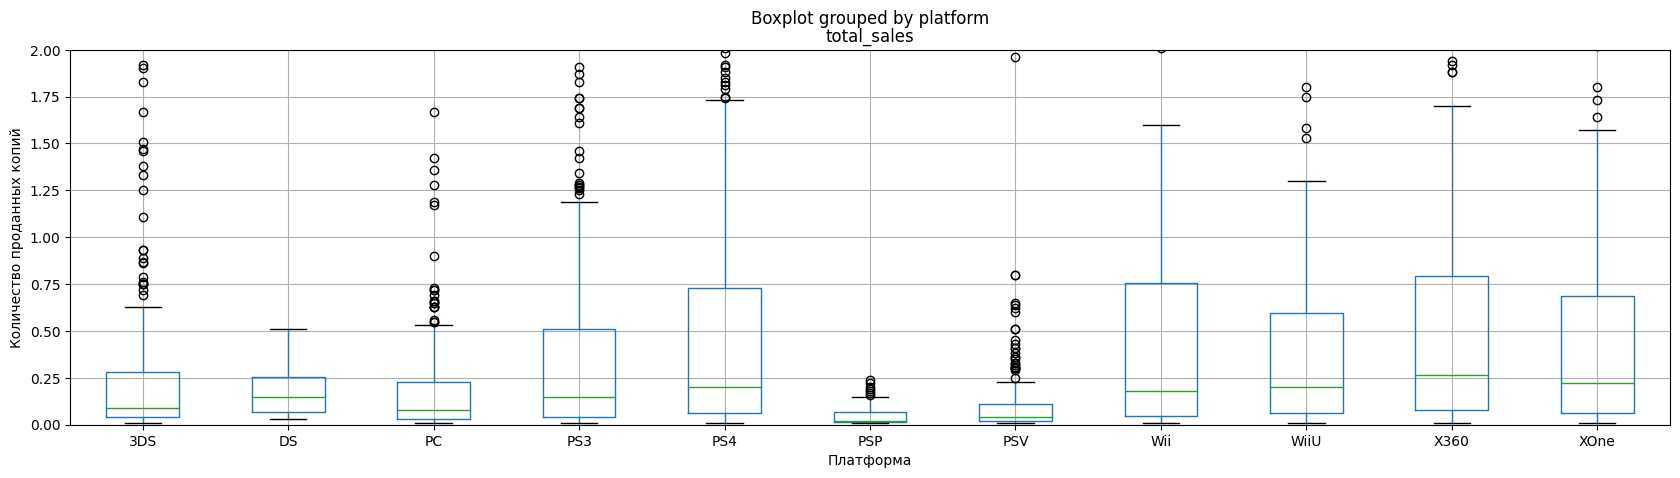

In [43]:
ax = actual_data.boxplot(column='total_sales', by='platform', figsize=(20, 5))
plt.ylim(0, 2)
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных копий');

Видно, что медианное, по факту, наибольшее количество продаж выше всего для X360 и XOne далее идут PS4, Wii, WiiU и PS3. Набольший разброс в сторону больших продаж (75% квантиль) у X360, XOne, PS4 и Wii. Их среднее значение продаж может заметно отличаться от медианного.

Проанализируем, как на продажи внутри популярных платформ влияет оценка критиков и пользователей. Возьмем PS4, так как эта платформа имеет наибольший разброс по количеству продаж

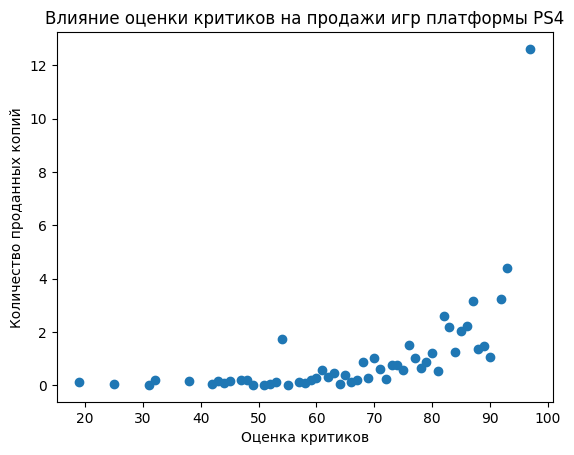

In [44]:
ax = (actual_data.query('platform == "PS4"')
 .pivot_table(index='critic_score', values='total_sales')
 .plot(style='o')
)
ax.set_title('Влияние оценки критиков на продажи игр платформы PS4')
ax.get_legend().remove()
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Количество проданных копий');

При оценке критиков выше 80 из 100 продажи игр платформы экспоненциально росли

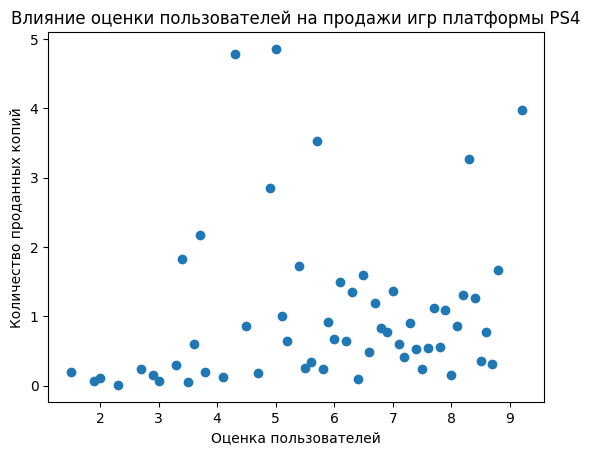

In [45]:
ax = (actual_data.query('platform == "PS4"')
 .pivot_table(index='user_score', values='total_sales')
 .plot(style='o')
)
ax.set_title('Влияние оценки пользователей на продажи игр платформы PS4')
ax.get_legend().remove()
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Количество проданных копий');

Оценка пользователей строго не влияла на продажи игр

Посмотрим на наличие зависимостей продаж от оценок через коэффициенты корреляции

In [46]:
actual_data.query('platform == "PS4"').corr()

,year_of_release,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
north_america_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
europe_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
japan_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Видно, что в то время как оценка пользователей не влияет ни на продажи игр на PS4 внутри отдельных регионов, ни на общие продажи, оценка критиков уже весома, наиболее сильно на нее обращают внимание в Северной Америке, меньше всего в Японии.

Посмотрим зависимости для всех платформ

In [47]:
(actual_data
 .drop(columns=['year_of_release','north_america_sales','europe_sales','japan_sales','other_sales', 'genre','name','rating'])
 .groupby(by='platform')
 .corr()
)

critic_score  user_score  total_sales
platform                                                    
3DS      critic_score      1.000000    0.769536     0.357057
         user_score        0.769536    1.000000     0.241504
         total_sales       0.357057    0.241504     1.000000
DS       critic_score           NaN         NaN          NaN
         user_score             NaN         NaN          NaN
         total_sales            NaN         NaN     1.000000
PC       critic_score      1.000000    0.429562     0.196030
         user_score        0.429562    1.000000    -0.093842
         total_sales       0.196030   -0.093842     1.000000
PS3      critic_score      1.000000    0.599920     0.334285
         user_score        0.599920    1.000000     0.002394
         total_sales       0.334285    0.002394     1.000000
PS4      critic_score      1.000000    0.557654     0.406568
         user_score        0.557654    1.000000    -0.031957
         total_sales       0.406568   -0.031957     1.000000
PSP      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000    -1.000000
         total_sales            NaN   -1.000000     1.000000
PSV      critic_score      1.000000    0.611521     0.254742
         user_score        0.611521    1.000000     0.000942
         total_sales       0.254742    0.000942     1.000000
Wii      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000     0.682942
         total_sales            NaN    0.682942     1.000000
WiiU     critic_score      1.000000    0.721313     0.376415
         user_score        0.721313    1.000000     0.419330
         total_sales       0.376415    0.419330     1.000000
X360     critic_score      1.000000    0.520946     0.350345
         user_score        0.520946    1.000000    -0.011742
         total_sales       0.350345   -0.011742     1.000000
XOne     critic_score      1.000000    0.472462     0.416998
         user_score        0.472462    1.000000    -0.068925
         total_sales       0.416998   -0.068925     1.000000

В целом, описанная выше зависимость сохраняется на всех платформах кроме WiiU, где оценка пользователей повлияла на продажи

Посмотрим, в каких жанрах было выпущено больше всего игр за актуальный период, и в каких жанрах было продано быльше всего игр

In [48]:
(actual_data
 .groupby(by='genre')['name']
 .count()
 .sort_values(ascending=False)
)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Больше всего игр выпускалось в жанрах Action, Role-Playing, Adventure и Sports. Меньше всего выпускалось игр жанров Puzzle, Strategy, Simulation и Platform.

In [49]:
(actual_data
 .groupby(by='genre')['total_sales']
 .sum()
 .sort_values(ascending=False)
)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

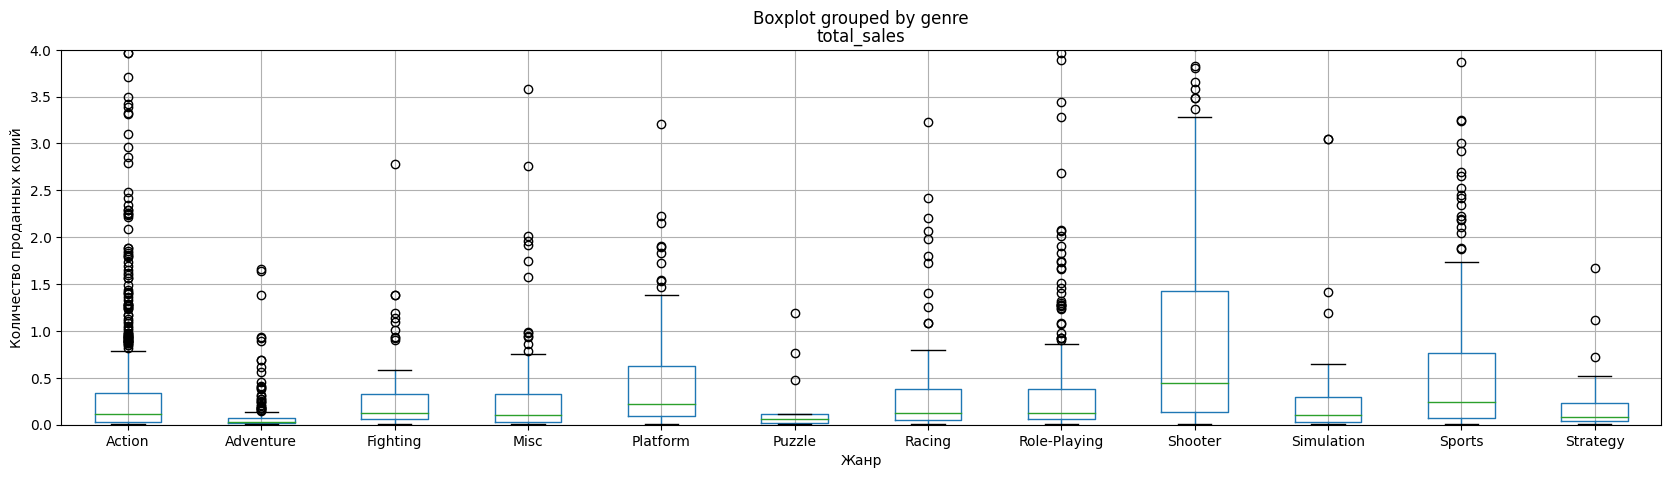

In [50]:
ax = actual_data.boxplot(column='total_sales', by='genre', figsize=(20,5))
plt.ylim(0,4)
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество проданных копий');

Самые продающиеся игры в жанре Shooter. Далее идут жанры Sports и Platform. Меньше всего продавались игры жанра Puzzle и Adventure. Жанр Shooter наиболее популярен, несмотря на относительно небольшое количество игр он лидирует по продажам, а вот жанр Action продается плохо несмотря на наибольшее количество выпущенных игр в этом жанре. Отличителен жанр Platform, который продается лучше Action при очень малом количестве выпущенных игр.

<b>Итог:</b>
- Максимальное количество игр выпускалось в 2008-2009 годах, известные в мире игры появились в 1980-м году, активное их распространение началось примерно с 90-95-х годов
- Большинство игр чаще всего продавалось в Северной Америке, количество людей в этой группе гораздо больше, чем в Европе или Японии. К-игры и и игры на PS4 (PlayStation 4) чаще продавались в Европе, а игры на 3DS (Nintendo 3DS), SAT (Sega Saturn), PSV (PSVita) и SNES (Super Nintendo) в Японии (потому что они там появились)
- Наибольшие суммарные продажи за все время с большим отрывом принесли платформы DS (Nintendo DS), PS (PlayStation), PS2 (PlayStation 2), PS3 (PlayStation 3), Wii (Nintendo Wii), X360 (Xbox 360)
- Средний срок, за который в продажах появляется, становится популярной и затем пропадает каждая из этих платформ, - это 8-10 лет, поэтому стоит взять последние (до 2016) 4 года как актуальный срок 
- В последние 4 года максимальное количество продаж игр осуществлялось в Европе и Северной Америке на платформе PS4. В Японии с гоаздо популярнее игры на 3DS.
- Наиболее часто продаваемые за актуальный период платформы - PS4, PS3, XOne, 3DS и X360.
- На этапе развития находятся платформы PS4, PSV, WiiU и PC, все остальные уже становятся малопопулярными к 2016-му году
- Наибольшее количество продаж выше всего для X360 и XOne. 
- Оценка пользователей не сильно влияет ни на продажи игр внутри отдельных регионов, ни на общие продажи, оценка критиков уже весома, наиболее сильно на нее обращают внимание в Северной Америке, меньше всего в Японии.
- Самые продающиеся игры в жанре Shooter. Меньше всего продавались игры жанра Puzzle и Adventure. Жанр Shooter наиболее популярен, несмотря на относительно небольшое количество игр он лидирует по продажам, а вот жанр Action продается плохо несмотря на наибольшее количество выпущенных игр в этом жанре. Отличителен жанр Platform, который продается лучше Action при очень малом количестве выпущенных игр.

## 4 Анализ данных по регионам

Определим самые популярные платформы для жителей трех исследуемых регионов

In [51]:
NA_top_platform = (actual_data
                   .pivot_table(index='platform', 
                                          values = 'north_america_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='north_america_sales',ascending=False)[:5]
                   .reset_index()
                  )

In [52]:
EU_top_platform = (actual_data
                   .pivot_table(index='platform', 
                                          values = 'europe_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='europe_sales', ascending=False)[:5]
                   .reset_index()
                  )

In [53]:
JP_top_platform = (actual_data
                   .pivot_table(index='platform', 
                                          values = 'japan_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='japan_sales', ascending=False)[:5]
                   .reset_index()
                  )

In [54]:
top_platforms = pd.concat([NA_top_platform, EU_top_platform, JP_top_platform], axis=1)
top_platforms

,platform,north_america_sales,platform,europe_sales,platform,japan_sales
0,PS4,108.74,PS4,141.09,3DS,67.81
1,XOne,93.12,PS3,67.81,PS3,23.35
2,X360,81.66,XOne,51.59,PSV,18.59
3,PS3,63.50,X360,42.52,PS4,15.96
4,3DS,38.20,3DS,30.96,WiiU,10.88


Общей, входящей в топ-5 самых популярных, платформой для всех регионов являются PS4, PS3 и 3DS. Вкусы жителей Северной Америки и Европы полностью схожи, у них общие популярные платформы также XOne и X360. Наиболее популярные платформы в Японии в среднем отличаются от платформ в других регионах, наиболее популярна там 3DS, а также в топ-5 входят PSV и WiiU.

Определим самые популярные жанры для жителей трех регионов

In [55]:
NA_top_genre = (actual_data
                   .pivot_table(index='genre', 
                                          values = 'north_america_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='north_america_sales',ascending=False)[:5]
                   .reset_index()
                  )

In [56]:
EU_top_genre = (actual_data
                   .pivot_table(index='genre', 
                                          values = 'europe_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='europe_sales', ascending=False)[:5]
                   .reset_index()
                  )

In [57]:
JP_top_genre = (actual_data
                   .pivot_table(index='genre', 
                                          values = 'japan_sales',
                                         aggfunc = 'sum')
                   .sort_values(by='japan_sales', ascending=False)[:5]
                   .reset_index()
                  )

In [58]:
top_genres = pd.concat([NA_top_genre, EU_top_genre, JP_top_genre], axis=1)
top_genres

,genre,north_america_sales,genre,europe_sales,genre,japan_sales
0,Action,126.05,Action,118.13,Role-Playing,51.04
1,Shooter,109.74,Shooter,87.86,Action,40.49
2,Sports,65.27,Sports,60.52,Misc,9.20
3,Role-Playing,46.40,Role-Playing,36.97,Fighting,7.65
4,Misc,27.49,Racing,20.19,Shooter,6.61


Вкусы по жанрам почти полностью совпадают для жителей Северной Америки и Европы, наиболее популярен у них жанр Action. А вот в Японии предпочтение отдается жанру Role-Playing, а уже потом Action. Во всех регионах популярны жанры Shooter, Action, Playing. В Европе интересуются жанорм Racing, в Японии - Fighting, в Японии и Америке - Misc, а в Америке и Европе - Sports.

Посмотрим на зависимость продаж от рейтинга в разных регионах

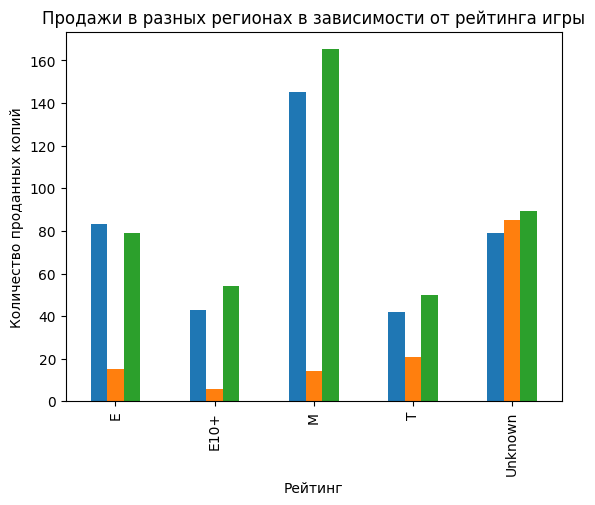

In [59]:
ax = (actual_data
 .pivot_table(index='rating', 
              values=['north_america_sales', 'europe_sales', 'japan_sales'],
              aggfunc='sum')
 .plot(kind='bar')
)
ax.set_title('Продажи в разных регионах в зависимости от рейтинга игры')
ax.get_legend().remove()
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Количество проданных копий');

Видно, что наибольшей популярностью в Северной Америке и Европе пользуются игры с рейтингом "для взрослых", дальше идут рейтинги "для всех" и "Unknown", который также наиболее популярен (с большим отрывом) в Японии. Так как рейтинг ESRB распространяется только на игры США и Канады, можно сделать вывод, что в Японии наиболее популярны игры не американского производства, а, скорее всего, своего, что подтверждается и наибольшей популярностью в Японии их собственной платформы

<b>Итог:</b>
- Общей, входящей в топ-5 самых популярных, платформой для всех регионов являются PS4, PS3 и 3DS. Вкусы жителей Северной Америки и Европы полностью схожи, у них общие популярные платформы также XOne и X360. Наиболее популярная платформа в Японии - 3DS, а также в топ-5 входят PSV и WiiU.

- Вкусы по жанрам почти полностью совпадают для жителей Северной Америки и Европы, наиболее популярен у них жанр Action. В Японии - Role-Playing. Во всех регионах популярны жанры Shooter, Action, Playing. 
- Наибольшей популярностью в Северной Америке и Европе пользуются игры с рейтингом "для взрослых", дальше идут рейтинги "для всех" и "Unknown", который также наиболее популярен (с большим отрывом) в Японии. Т.е. в Америке и Европе популярны как американские игры, так и игры из других стран, в Японии в основном свои игры.

## 5 Проверка гипотез

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score) платформы PC

H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ средний пользовательский рейтинг (user_score) платформы PC

Возьмем alpha = 5% и сделаем проверку средних с разными дисперсиями, так как сравниваются регионы с разным количеством пользователей

In [60]:
platform_results = st.ttest_ind(actual_data.query('platform == "PC"')['user_score'].dropna(),
                               actual_data.query('platform == "XOne"')['user_score'].dropna(),
                              equal_var=False)
                               

alpha = .05

print(platform_results.pvalue)
if platform_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергается, значит, средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score) платформы PC

Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра  Sports

H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра  Sports

Возьмем alpha = 5% и сделаем проверку средних с разными дисперсиями, так как сравниваются регионы с разным количеством пользователей

In [61]:
genre_results = st.ttest_ind(actual_data.query('genre == "Action"')['user_score'].dropna(),
                               actual_data.query('genre == "Sports"')['user_score'].dropna(),
                               equal_var=False)
                            
alpha = .05

print(genre_results.pvalue)
if genre_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704318e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается, значит, средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра Sports

<b>Итог:</b>
- Средний пользовательский рейтинг (user_score) платформы Xbox One = средний пользовательский рейтинг (user_score) платформы PC
- Средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра Sports

## 6 Общий вывод

- Данные предварительно обработаны, удалены неинформативные строки, пропуски в рейтинге изменены на заглушки
- Актуальный период рассмотрения платформы - 4 года
- На этапе развития находятся платформы PS4, PSV, WiiU и PC
- Медианное наибольшее количество продаж выше всего для X360, XOne и PS4
- Оценка пользователей не сильно влияет ни на продажи игр на PS3 внутри отдельных регионов, ни на общие продажи, оценка критиков уже весома.
- В Японии популярные платформы и жанры отличаются от платформ и жанров в Европе и Северной Америке
- Наибольшей популярностью в Северной Америке и Европе пользуются американские игры с рейтингом "для взрослых", а вот в Японии - свои игры, не определяющиеся в рамках ESRB 
- Самые продающиеся игры в жанре Shooter. Жанр Platform хорошо продается при очень малом количестве выпущенных игр. Игры жанра Action продаются плохо.
- Средние рейтинги для Xbox One и PC равны
- Средние рейтинги для Action и Sports игр не равны